In [ ]:
!pip install vncorenlp
!mkdir -p vncorenlp/models/wordsegmenter
!wget https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/VnCoreNLP-1.1.1.jar
!wget https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/models/wordsegmenter/vi-vocab
!wget https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/models/wordsegmenter/wordsegmenter.rdr
!mv VnCoreNLP-1.1.1.jar vncorenlp/
!mv vi-vocab vncorenlp/models/wordsegmenter/
!mv wordsegmenter.rdr vncorenlp/models/wordsegmenter/


     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2.6/2.6 MB 22.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for vncorenlp: filename=vncorenlp-1.0.3-py3-none-any.whl size=2645932 sha256=f1cb1caa704b85ff36d8e561606d87223091fe111cdc1a2c633688e729144536
  Stored in directory: /root/.cache/pip/wheels/5d/d9/b3/41f6c6b1ab758561fd4aab55dc0480b9d7a131c6aaa573a3fa
Successfully built vncorenlp
--2025-01-14 01:58:15--  https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/VnCoreNLP-1.1.1.jar
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27412575 (26M) [application/octet-stream]
Saving to: ‚ÄòVnCoreNLP-1.1.1.jar‚Äô

VnCoreNLP-1.1.1.jar 100%[===============

In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import re
import seaborn as sns
from gensim.parsing.preprocessing import strip_non_alphanum, strip_multiple_whitespaces,preprocess_string, split_alphanum, strip_short, strip_numeric

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix
import joblib
from vncorenlp import VnCoreNLP
from sklearn.metrics import classification_report, accuracy_score


In [ ]:
# Kh·ªüi t·∫°o VnCoreNLP
vncorenlp = VnCoreNLP("vncorenlp/VnCoreNLP-1.1.1.jar", annotators="wseg", max_heap_size='-Xmx500m')
rdrsegmenter = VnCoreNLP("vncorenlp/VnCoreNLP-1.1.1.jar", annotators="wseg", max_heap_size='-Xmx2g')

In [ ]:
# Load datasets
train_data = pd.read_csv('train_data.csv')

In [ ]:
train_data

Email  Label
0                                                   NaN      1
1                                                   NaN      0
2     Xin ch√†o Hu·ª≥nh ƒê√¥ Í™ú,\n\nB√πi Duy T√¢n ƒë√£ g·ª≠i m·ªôt...      0
3     [QC] Galaxy Z Series m·ªõi ch√≠nh th·ª©c ra m·∫Øt!\n\...      1
4     C·∫£m ∆°n Qu√Ω kh√°ch ƒë√£ s·ª≠ d·ª•ng d·ªãch v·ª• MB eBankin...      0
...                                                 ...    ...
6320  Google Play\n\n\n\n\n\nC·∫£m ∆°n b·∫°n\n\n\n\n\n\nB...      0
6321  Xin ch√†o Hu·ª≥nh ƒê√¥ Í™ú,\n\nƒê√†o Th·ªã Ph∆∞∆°ng Anh, Ng...      0
6322  Xin ch√†o Hu·ª≥nh ƒê√¥ Í™ú,\n\nL√™ Xu√¢n Ph∆∞·ªõc, Nguy·ªÖn ...      0
6323  Ch√†o \nNguy·ªÖn B√° Th√†nh\n\n\n\n\n\n\n\n\n\n\nCa...      0
6324  [QC] ∆ØU ƒê√ÉI C·ª∞C ƒê·ªàNH NG√ÄY ƒê·ªòC TH√ÇN 11.11\n\n\n...      1

[6325 rows x 2 columns]

In [ ]:
spam=train_data[train_data['Label']==1]

In [ ]:
ham=train_data[train_data['Label']==0]

In [ ]:
spam

Email  Label
0                                                   NaN      1
3     [QC] Galaxy Z Series m·ªõi ch√≠nh th·ª©c ra m·∫Øt!\n\...      1
5     ‚ÄúB√≠ k√≠p‚Äù chi ti√™u th·ªèa th√≠ch v·ªõi E-voucher Vin...      1
7     T·ª´ Ng√†y 1 Th√°ng 12 2022, khi ƒëƒÉng nh·∫≠p, ng∆∞·ªùi ...      1
8     Tu·∫ßn l·ªÖ Galaxy 03.03 - 10.03\n\n\n\n\n\n\n\n\n...      1
...                                                 ...    ...
6306  Nh·ªØng vi·ªác l√†m IT m·ªõi nh·∫•t tr√™n TopDev, kh√°m p...      1
6307  [ View in browser](https://r.cskh.cellphones.c...      1
6308  ƒê·ª´ng b·ªè qua c√°c c∆° h·ªôi vi·ªác l√†m h·∫•p d·∫´n s·∫Øp h·∫ø...      1
6316  B·ªò GI√ÅO D·ª§C V√Ä ƒê√ÄO T·∫†O\n\n\nK·ª≤ THI T·ªêT NGHI·ªÜP ...      1
6324  [QC] ∆ØU ƒê√ÉI C·ª∞C ƒê·ªàNH NG√ÄY ƒê·ªòC TH√ÇN 11.11\n\n\n...      1

[1920 rows x 2 columns]

<Axes: xlabel='Label', ylabel='count'>

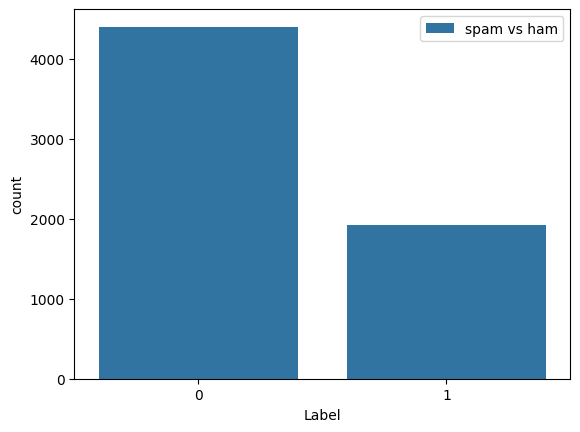

In [ ]:
sns.countplot(x='Label', data=train_data, label='spam vs ham')

In [ ]:
# Lo·∫°i b·ªè c√°c d√≤ng b·ªã thi·∫øu gi√° tr·ªã
train_data = train_data.dropna(subset=['Email', 'Label'])
# T·ª± ƒë·ªãnh nghƒ©a stopwords ti·∫øng Vi·ªát
vietnamese_stopwords = set(["v√†", "l√†", "c·ªßa", "c√≥", "m·ªôt", "v·ªõi", "cho", "ƒë∆∞·ª£c", "nh∆∞", "n√†y", "·ªü", "tr√™n", "b·∫±ng"])
def clean_text(text):
    # Lo·∫°i b·ªè URL
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    # Lo·∫°i b·ªè k√Ω t·ª± ƒë·∫∑c bi·ªát
    text = re.sub(r'\W', ' ', text)
    # Lo·∫°i b·ªè s·ªë
    text = re.sub(r'\d', '', text)
    # Lo·∫°i b·ªè kho·∫£ng tr·∫Øng th·ª´a
    text = re.sub(r'\s+', ' ', text).strip()
    text = strip_non_alphanum(text).lower().strip()
    text = split_alphanum(text)
    return text

def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in vietnamese_stopwords])

# √Åp d·ª•ng h√†m l√†m s·∫°ch cho d·ªØ li·ªáu
train_data['Email'] = train_data['Email'].apply(clean_text)

# Lo·∫°i b·ªè c√°c m·∫´u tr√πng l·∫∑p
train_data = train_data.drop_duplicates()
# √Åp d·ª•ng
train_data['Email'] = train_data['Email'].apply(remove_stopwords)

<ipython-input-10-32bafce245cf>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Email'] = train_data['Email'].apply(clean_text)


In [ ]:
def word_segmentation(text):
    # T√°ch t·ª´ b·∫±ng VNCoreNLP
    segmented_text = rdrsegmenter.tokenize(text)

    # Gh√©p l·∫°i th√†nh chu·ªói
    return ' '.join([' '.join(sentence) for sentence in segmented_text])

def extract_compound_words(segmented_text):
    tokens = segmented_text.split()
    compound_words = []
    for i in range(len(tokens) - 1):
      compound_words.append(tokens[i] + " " + tokens[i+1])
    return compound_words

In [ ]:
print(train_data.head())

                                               Email  Label
2  xin ch√†o hu·ª≥nh ƒë√¥ Í™ú b√πi duy t√¢n ƒë√£ g·ª≠i tin nh·∫Ø...      0
3  qc galaxy z series m·ªõi ch√≠nh th·ª©c ra m·∫Øt ƒë·∫∑t t...      1
4  c·∫£m ∆°n qu√Ω kh√°ch ƒë√£ s·ª≠ d·ª•ng d·ªãch v·ª• mb ebankin...      0
5  b√≠ k√≠p chi ti√™u th·ªèa th√≠ch e voucher vinid tri...      1
6  xin ch√†o hu·ª≥nh ƒë√¥ Í™ú tr·∫ßn th·ªã h·ªìng nhung ph·∫°m k...      0


In [ ]:
# L∆∞u d·ªØ li·ªáu ƒë√£ x·ª≠ l√Ω
train_data.to_csv('train_final.csv', index=False)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
spamham_countVectorizer=vectorizer.fit_transform(train_data['Email'])

In [ ]:
print(vectorizer.get_feature_names_out())
print(len(vectorizer.get_feature_names_out()))

['__' '___' '_____' ... 'ùô±ùöõùöòùöîùöéùöó' 'ùô∑ùöéùöäùöõùöù' 'ùô∫ùôª']
12727


In [ ]:
spamham_countVectorizer.shape

(4637, 12727)

In [ ]:
label=train_data['Label']
X=spamham_countVectorizer
y=label

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
NB_classifier=MultinomialNB()
NB_classifier.fit(X_train,y_train)

MultinomialNB()

In [ ]:
y_predict_train=NB_classifier.predict(X_train)
#y_predict_train

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
cm=confusion_matrix(y_train,y_predict_train)

<Axes: >

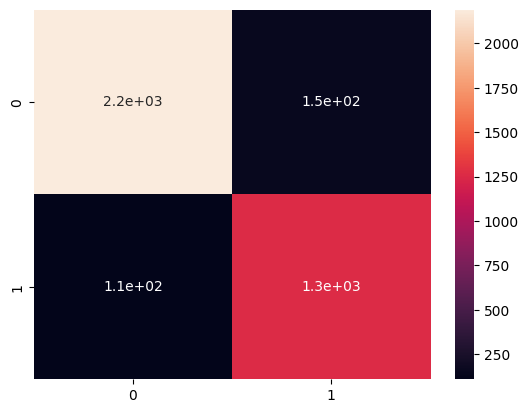

In [ ]:
sns.heatmap(cm,annot=True)

In [ ]:
y_predict_train=NB_classifier.predict(X_train)
# Predict on the test set to get y_predict_test
y_predict_test = NB_classifier.predict(X_test)
cm1=confusion_matrix(y_test,y_predict_test)

In [ ]:
print(classification_report(y_train,y_predict_train))
# T√≠nh accuracy ri√™ng
accuracy = accuracy_score(y_train, y_predict_train)
print(f"Accuracy: {accuracy:.2f}")


              precision    recall  f1-score   support

           0       0.95      0.94      0.94      2340
           1       0.89      0.92      0.91      1369

    accuracy                           0.93      3709
   macro avg       0.92      0.93      0.93      3709
weighted avg       0.93      0.93      0.93      3709

Accuracy: 0.93


In [ ]:
y_predict_test=NB_classifier.predict(X_test)
y_predict_test

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,

<Axes: >

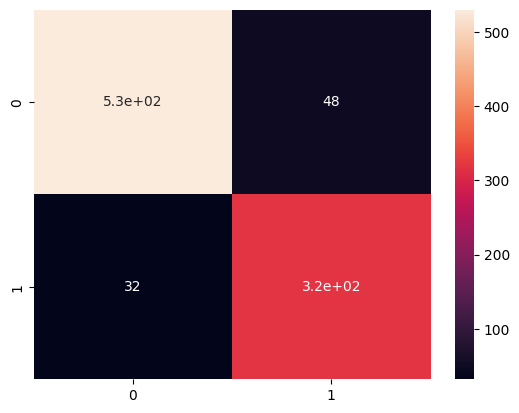

In [ ]:
sns.heatmap(cm1,annot=True)

In [ ]:
# B√°o c√°o chi ti·∫øt
print(classification_report(y_test, y_predict_test))

# T√≠nh accuracy ri√™ng
accuracy = accuracy_score(y_test, y_predict_test)
print(f"Accuracy: {accuracy:.2f}")


              precision    recall  f1-score   support

           0       0.94      0.92      0.93       578
           1       0.87      0.91      0.89       350

    accuracy                           0.91       928
   macro avg       0.91      0.91      0.91       928
weighted avg       0.92      0.91      0.91       928

Accuracy: 0.91


In [ ]:
import joblib

# L∆∞u vectorizer
joblib.dump(vectorizer, 'count_vectorizer.pkl')
joblib.dump(NB_classifier, 'naive_bayes_model.pkl')

['naive_bayes_model.pkl']

In [ ]:
# D·ª± ƒëo√°n tr√™n t·∫≠p d·ªØ li·ªáu m·ªõi
new_data = vectorizer.transform(["T√¥i l√† hi·ªÉn"])
prediction = NB_classifier.predict(new_data)




print("K·∫øt qu·∫£ d·ª± ƒëo√°n:", "Spam" if prediction[0] == 1 else "Not Spam")

K·∫øt qu·∫£ d·ª± ƒëo√°n: Not Spam
